In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../data/fraud_order_classifier.csv")
df.head()

,order_id,product_id,quantity,selling_price,order_date,shipping_type,user_id,user_account_created_date,address_id,city,...,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label
0,a2183866942a8ecd252727d95130ff29,e7b06ca068c7f50b06ecb5758b51258d,1,5507,2014-05-24,non-ndd,00305fba264d3fd74b9da8cb8c6ab654,2012-08-13 06:04:03,9701f7016eff920d184e4764aac211e2,9f6774de2352cf01e1be77f8aa4cf604,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
1,61c2c93a011a78c76d2e720120bbfd4c,7fec8d8425a12add61c7a83d8270a0cb,1,6999,2014-05-23,ndd,f1f9a2662d06cfd0abc8d2b7147ade37,2012-04-25 09:08:45,a3c2e034510ab9f992bf86ad6327fc6b,89e5701b3aee3a4011e76c441044028b,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
2,4049bffb21037c1ba41064802baa86f6,59f6d6f76798b14e053f136a5c726d65,1,5589,2014-05-28,non-ndd,a3e8c45cd263e72f7001303a8b22649c,2012-08-10 18:44:49,8fc0ad66f61f9612d9aec2e0ddeebc10,64f692fc1ed662e37a49acaf1c0d0b4a,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
3,51317d4d2583de8a4813972c94637449,a57566363f05f7bba50c1f7d3d6a93f8,1,79,2014-05-27,non-ndd,beda308ae5e3bfcefd1d9394c6532bce,2012-10-19 00:56:02,ee8df0f2fb20e881eb503748fa653d29,90a60ca1704e4b34248b98bc417c4f58,...,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal
4,25bc2ec67785edcfa5f93ee14023bf8b,3a54c84b0446bf27d46df55edb48c2e1,1,147,2014-05-27,non-ndd,beda308ae5e3bfcefd1d9394c6532bce,2012-10-19 00:56:02,ee8df0f2fb20e881eb503748fa653d29,90a60ca1704e4b34248b98bc417c4f58,...,0.0,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal


## EDA
Things to do: 
1. Missing values 
2. Explore numerical features
3. Explore categorical features 
4. Explore relaionship between features 

In [4]:
print("shape of data:", df.shape)

shape of data: (481107, 40)


In [5]:
## Check for duplicates
df.drop_duplicates(inplace=True)

In [6]:
print("shape of data:", df.shape)

shape of data: (481107, 40)


In [7]:
df['label'].value_counts()

normal    459027
fraud      22080
Name: label, dtype: int64

In [8]:
df['label'].value_counts(normalize = True)

normal    0.954106
fraud     0.045894
Name: label, dtype: float64

We have a highly unbalanced dataset. Only 4.5% of the data belongs to the fraud category. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481107 entries, 0 to 481106
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   order_id                      481107 non-null  object 
 1   product_id                    481107 non-null  object 
 2   quantity                      481107 non-null  int64  
 3   selling_price                 481107 non-null  int64  
 4   order_date                    481107 non-null  object 
 5   shipping_type                 481107 non-null  object 
 6   user_id                       481107 non-null  object 
 7   user_account_created_date     481107 non-null  object 
 8   address_id                    481107 non-null  object 
 9   city                          481107 non-null  object 
 10  pincode                       481107 non-null  object 
 11  phone                         481107 non-null  object 
 12  vertical                      481107 non-nul

In [10]:
## get the categorical columns
cat_cols = df.select_dtypes(include = ['object']).columns.to_list()

## get the numeric columns
num_cols = df.select_dtypes(include = ['float64','int64']).columns.to_list()

# Convert date columns to datetime 
df['user_account_created_date'] = pd.to_datetime(df['user_account_created_date'])
df['order_date']= pd.to_datetime(df['order_date'])

In [11]:
print("Number of categorical columns including target variable: ",len(cat_cols))
print("Number of numeric columns: ",len(num_cols))

Number of categorical columns including target variable:  12
Number of numeric columns:  28


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
quantity,481107.0,1.077401,0.367006,1.0,1.000,1.0,1.000,10.000
selling_price,481107.0,4327.573053,7047.851746,1.0,214.000,559.0,6999.000,152955.000
discount,481107.0,15.413950,13.376370,0.0,1.946,14.0,24.738,69.944
count_14_days,481107.0,24.710054,162.501839,1.0,1.000,1.0,3.000,3072.000
count_28_days,481107.0,24.710054,162.501839,1.0,1.000,1.0,3.000,3072.000
count_56_days,481107.0,24.710054,162.501839,1.0,1.000,1.0,3.000,3072.000
category_purchase_count_bks,461903.0,606.148780,4535.245052,0.0,0.000,5.0,28.000,227262.000
category_purchase_count_X4kt,461903.0,0.968502,10.952076,0.0,0.000,0.0,0.000,1195.000
category_purchase_count_X4rr,461903.0,0.629665,21.589054,0.0,0.000,0.0,0.000,1554.000
category_purchase_count_dep,461903.0,0.171824,1.391025,0.0,0.000,0.0,0.000,191.000


Looks like there are a lot of skewed values for each columns which could be outliers. For the category_purchase columns most values are 0.

In [13]:
# Since order_id is a unique identifier column we can drop it from the data
df.drop(['order_id'], axis = 1, inplace = True)

### Missing values 

In [14]:
df.isnull().sum()

product_id                          0
quantity                            0
selling_price                       0
order_date                          0
shipping_type                       0
user_id                             0
user_account_created_date           0
address_id                          0
city                                0
pincode                             0
phone                               0
vertical                            0
discount                            0
count_14_days                       0
count_28_days                       0
count_56_days                       0
category_purchase_count_bks     19204
category_purchase_count_X4kt    19204
category_purchase_count_X4rr    19204
category_purchase_count_dep     19204
category_purchase_count_kyh     19204
category_purchase_count_mgl     19204
category_purchase_count_dgv     19204
category_purchase_count_ixq     19204
category_purchase_count_X26x    19204
category_purchase_count_t06     19204
category_pur

All the category_purchase columns have missing values. Lets check the percentage of this missing data coming from the fraud vs normal cases

In [15]:
print("% Missing from fraud:",(df[df.label=='fraud']['category_purchase_count_osp'].isnull().sum())*100/22080)
print("% Missing from normal:",(df[df.label=='normal']['category_purchase_count_osp'].isnull().sum())*100/459027)

% Missing from fraud: 3.097826086956522
% Missing from normal: 4.034621057149144


Since only a small fraction of data is missing, I will drop those rows from the data as imputing these column values may not show the true representation of the data. Category purchased represents the amount purchased by the customer from that category and is therefore related to customer behavior. 

In [16]:
df = df.dropna()


In [17]:
df.isnull().sum()

product_id                      0
quantity                        0
selling_price                   0
order_date                      0
shipping_type                   0
user_id                         0
user_account_created_date       0
address_id                      0
city                            0
pincode                         0
phone                           0
vertical                        0
discount                        0
count_14_days                   0
count_28_days                   0
count_56_days                   0
category_purchase_count_bks     0
category_purchase_count_X4kt    0
category_purchase_count_X4rr    0
category_purchase_count_dep     0
category_purchase_count_kyh     0
category_purchase_count_mgl     0
category_purchase_count_dgv     0
category_purchase_count_ixq     0
category_purchase_count_X26x    0
category_purchase_count_t06     0
category_purchase_count_amz     0
category_purchase_count_reh     0
category_purchase_count_ckf     0
category_purch

In [18]:
df['label'].value_counts()

normal    440507
fraud      21396
Name: label, dtype: int64

### Analyze Numeric Features 

In [19]:
df.groupby('label').median().transpose()

label,fraud,normal
quantity,1.000,1.0
selling_price,8599.000,513.0
discount,13.916,14.0
count_14_days,2.000,1.0
count_28_days,2.000,1.0
count_56_days,2.000,1.0
category_purchase_count_bks,0.000,6.0
category_purchase_count_X4kt,0.000,0.0
category_purchase_count_X4rr,0.000,0.0
category_purchase_count_dep,0.000,0.0


On thing that stands out from the above is that the means of selling price for the fraud and normal cases are very different. Similar observation can be made for some categories. X2oq,X6bo,tyy,606,ixq,dgv,mgl,X4rr

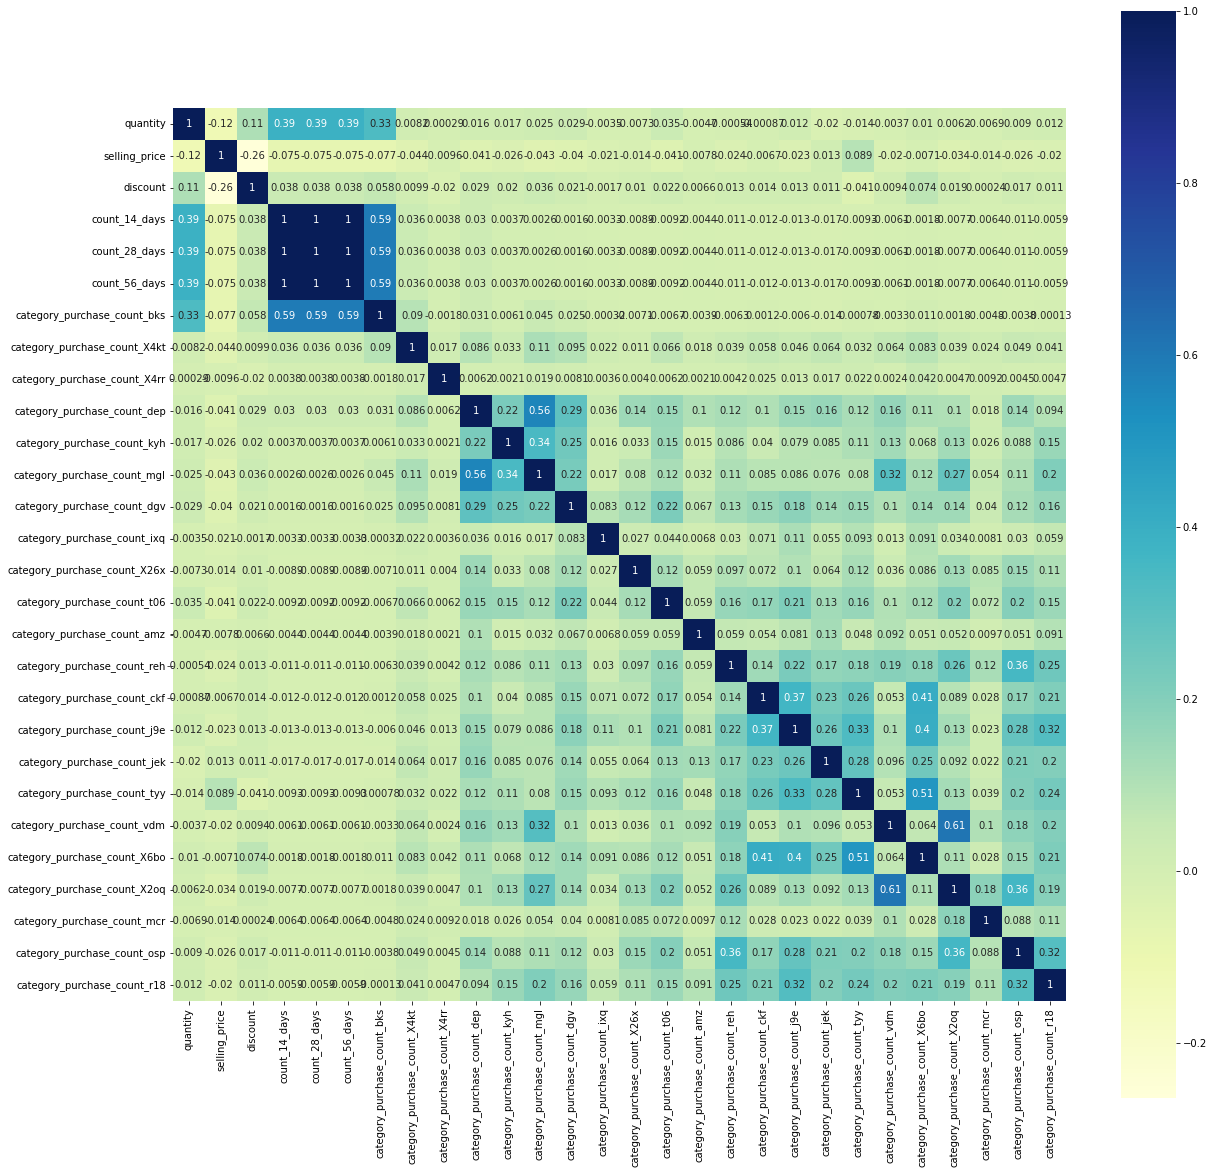

In [20]:
corrmat = df.corr()
fig = plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, vmax = 1, square = True, cmap = "YlGnBu", annot = True)
plt.show()

From the above plot, we can see that count 14, 28 and 56 days have perfect correlation.Looks like they may just be duplicates. 
Another thing to note is that some of the category purchased columns are correlated, which could represent items that tend to be bought together. 

In [21]:
print((df['count_14_days'] -df['count_56_days']).sum())
print((df['count_28_days'] -df['count_56_days']).sum())

0
0


In [22]:
## Drop duplicate columns 
df = df.drop(columns = ['count_14_days','count_28_days'])

In [23]:
## get the numeric columns
num_cols = df.select_dtypes(include = ['float64','int64']).columns.to_list()
num_cols

['quantity',
 'selling_price',
 'discount',
 'count_56_days',
 'category_purchase_count_bks',
 'category_purchase_count_X4kt',
 'category_purchase_count_X4rr',
 'category_purchase_count_dep',
 'category_purchase_count_kyh',
 'category_purchase_count_mgl',
 'category_purchase_count_dgv',
 'category_purchase_count_ixq',
 'category_purchase_count_X26x',
 'category_purchase_count_t06',
 'category_purchase_count_amz',
 'category_purchase_count_reh',
 'category_purchase_count_ckf',
 'category_purchase_count_j9e',
 'category_purchase_count_jek',
 'category_purchase_count_tyy',
 'category_purchase_count_vdm',
 'category_purchase_count_X6bo',
 'category_purchase_count_X2oq',
 'category_purchase_count_mcr',
 'category_purchase_count_osp',
 'category_purchase_count_r18']

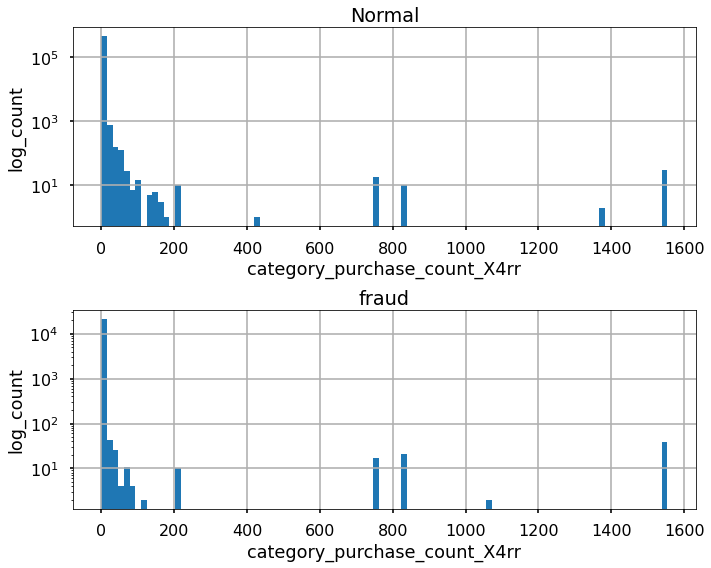

In [26]:
col ='category_purchase_count_X4rr'
plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
df[df.label=='normal'][col].hist(bins = 100)
plt.yscale("log")
plt.xlabel(col)
plt.ylabel("log_count")
plt.title('Normal')
plt.subplot(2,1,2)
df[df.label=='fraud'][col].hist(bins = 100)
plt.yscale("log")
plt.xlabel(col)
plt.ylabel("log_count")
plt.title('fraud')
plt.tight_layout()


In [27]:
len(num_cols)

26

### Analyze the date columns


In [29]:
df.describe(datetime_is_numeric=True)

,quantity,selling_price,order_date,user_account_created_date,discount,count_56_days,category_purchase_count_bks,category_purchase_count_X4kt,category_purchase_count_X4rr,category_purchase_count_dep,...,category_purchase_count_ckf,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18
count,461903.000000,461903.000000,461903,461903,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,...,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000,461903.000000
mean,1.076780,4390.215777,2014-05-25 13:52:44.090295552,2013-03-04 21:54:44.512235008,15.382467,25.032803,606.148780,0.968502,0.629665,0.171824,...,0.163095,0.227987,0.107352,2.256130,0.068688,1.514656,0.826381,0.019405,0.365901,0.134769
min,1.000000,1.000000,2014-05-20 00:00:00,2005-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,214.000000,2014-05-23 00:00:00,2012-04-28 13:38:17,1.946000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,577.000000,2014-05-26 00:00:00,2013-06-21 15:46:46,14.000000,1.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6999.000000,2014-05-29 00:00:00,2014-05-01 16:59:28.500000,24.738000,3.000000,28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,152955.000000,2014-05-31 00:00:00,2014-05-31 23:57:16,69.944000,3072.000000,227262.000000,1195.000000,1554.000000,191.000000,...,265.000000,296.000000,127.000000,762.000000,195.000000,1737.000000,1039.000000,55.000000,446.000000,99.000000
std,0.365957,7090.081119,NaN,NaN,13.388629,165.255880,4535.245052,10.952076,21.589054,1.391025,...,1.320227,1.791107,0.781943,7.026356,1.112451,9.045336,6.601881,0.391705,2.415578,1.294163


We have 2 date columns `order_date` , `user_account_created_date`. We can look at them to see if there is a pattern to when the fradulent activities are happenning the most. `order_date` does not have time stamps. So we can't use it for this analysis. We can look at the `user_account_created_date` on an hourly basis to see if there is a particular hour when fraudsters tend to create accounts. 

In [30]:
df1 = df.copy()
df1['acc_created_hr'] = df1['user_account_created_date'].dt.hour

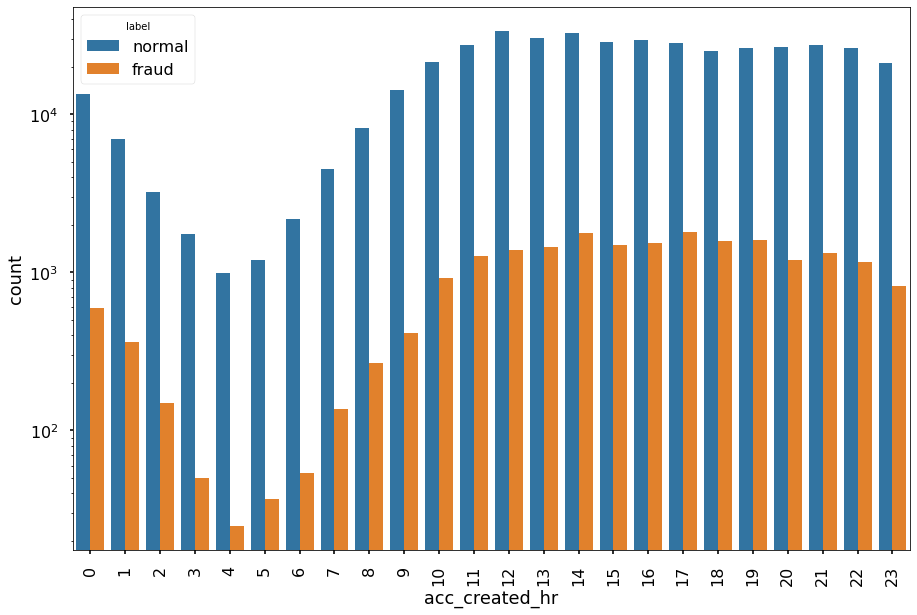

In [31]:
plt.figure(figsize = (15,10))
sns.countplot(x="acc_created_hr", hue="label", data=df1)
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()


Both activities tend to follow similar pattern. 

In [32]:
## Convert time columns to get duration for which the user has been a customer. 
## Extracting day in this way puts -1 for the same day. So, I add one so that 0 represents account created on the same day   

df['duration_customer']=(df['order_date']-df['user_account_created_date']).dt.days+1

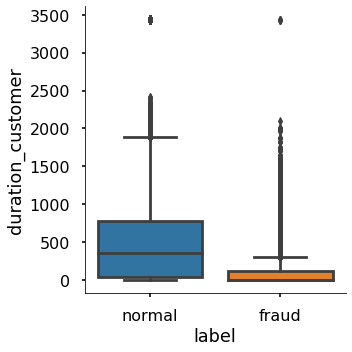

In [33]:
sns.catplot(y="duration_customer", x="label",data=df,kind="box")

observation: most fraud transactions tend to be the ones for new accounts(there are lot of outliers though). Now, we can drop the date columns and keep only the customer duration column.

In [34]:
df = df.drop(columns = ['order_date','user_account_created_date'])
df.head()

,product_id,quantity,selling_price,shipping_type,user_id,address_id,city,pincode,phone,vertical,...,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label,duration_customer
1,7fec8d8425a12add61c7a83d8270a0cb,1,6999,ndd,f1f9a2662d06cfd0abc8d2b7147ade37,a3c2e034510ab9f992bf86ad6327fc6b,89e5701b3aee3a4011e76c441044028b,b4ec1f705e664ba907ce1ce14125cc2f,000027799e494160ebada3a8887dd37a,Handset,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,758
2,59f6d6f76798b14e053f136a5c726d65,1,5589,non-ndd,a3e8c45cd263e72f7001303a8b22649c,8fc0ad66f61f9612d9aec2e0ddeebc10,64f692fc1ed662e37a49acaf1c0d0b4a,64aab4822a93ee289b127feffe5ec856,000046d64a9eaaf8832f717e3cfa5c72,MobileTabletWithCallFacility,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,normal,656
3,a57566363f05f7bba50c1f7d3d6a93f8,1,79,non-ndd,beda308ae5e3bfcefd1d9394c6532bce,ee8df0f2fb20e881eb503748fa653d29,90a60ca1704e4b34248b98bc417c4f58,4affb666770e43a21a8c3f3b9e1cf5dc,00005ebc921ffb6b3f0f3ba772feb585,Book,...,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal,585
4,3a54c84b0446bf27d46df55edb48c2e1,1,147,non-ndd,beda308ae5e3bfcefd1d9394c6532bce,ee8df0f2fb20e881eb503748fa653d29,90a60ca1704e4b34248b98bc417c4f58,4affb666770e43a21a8c3f3b9e1cf5dc,00005ebc921ffb6b3f0f3ba772feb585,Book,...,1.0,16.0,0.0,3.0,7.0,0.0,1.0,2.0,normal,585
5,d4eb6f495c826f6b5db7e5a06f986f5c,1,4225,non-ndd,788da8e6b5f1ea8e12db5ded8a56f98f,c407732fc10c0bcda72341dc374f036f,20f5b086ee309eb5c749145d3f0d939f,deef84d2c2a25842b3e307c7f35b858a,000092ca21f606c36416f3c4bb0faab7,ExternalHardDisk,...,1.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,normal,342


### Analyze categorical columns 

In [35]:
df.describe(include ='object').transpose()

,count,unique,top,freq
product_id,461903,43098,72c9a794b76376b2aae0a5b4cea40d03,34486
shipping_type,461903,2,non-ndd,428738
user_id,461903,296995,10956db6a8fc8e92d6d24b7990308ccb,1303
address_id,461903,311349,556241eb6a126624dd1bf865d64b03cf,1303
city,461903,6462,89e5701b3aee3a4011e76c441044028b,47101
pincode,461903,5637,8e8f6f0df87c8979d453308ba75ba242,4445
phone,461903,298775,a670eee7444a91473818c8a6b99a3191,1307
vertical,461903,46,Book,236992
label,461903,2,normal,440507


* product_id has ~43K unique products purchased during this period out of which ~34k belong to 1 dominant category 
* order_date: all orders come from 12 day duration(20-31 May,2014)
* shipping_type: dominated by non-ndd
* user ids: one user can have multiple purchases. The top user id has made maximum purchases. 
* address_id: 3.1L unique addresses while 2.9L unique user_ids, means some users may have multiple addresses/multiple accounts
* phone: some users can have multiple phone numbers, unique count is more than the unique user_id.
* city: 6694 unique entries
* Pincode: 5681 unique entries 
* Vertical: 46 unique out of which half of them comes from books category


In [36]:
## which verticals are dominant in fraud
df[df.label =='fraud']['vertical'].value_counts(normalize = True).cumsum()[:5]

Handset                         0.609226
MobileTabletWithCallFacility    0.755889
ExternalHardDisk                0.860628
Book                            0.942793
Game                            0.958871
Name: vertical, dtype: float64

These are the top categories accounting for 95% of fraud committed.  

In [37]:
## which verticals are dominant in normal
df[df.label =='normal']['vertical'].value_counts(normalize = True).cumsum()[:5]

Book                0.534007
Handset             0.830012
ExternalHardDisk    0.866765
Trimmer             0.881580
Game                0.896256
Name: vertical, dtype: float64

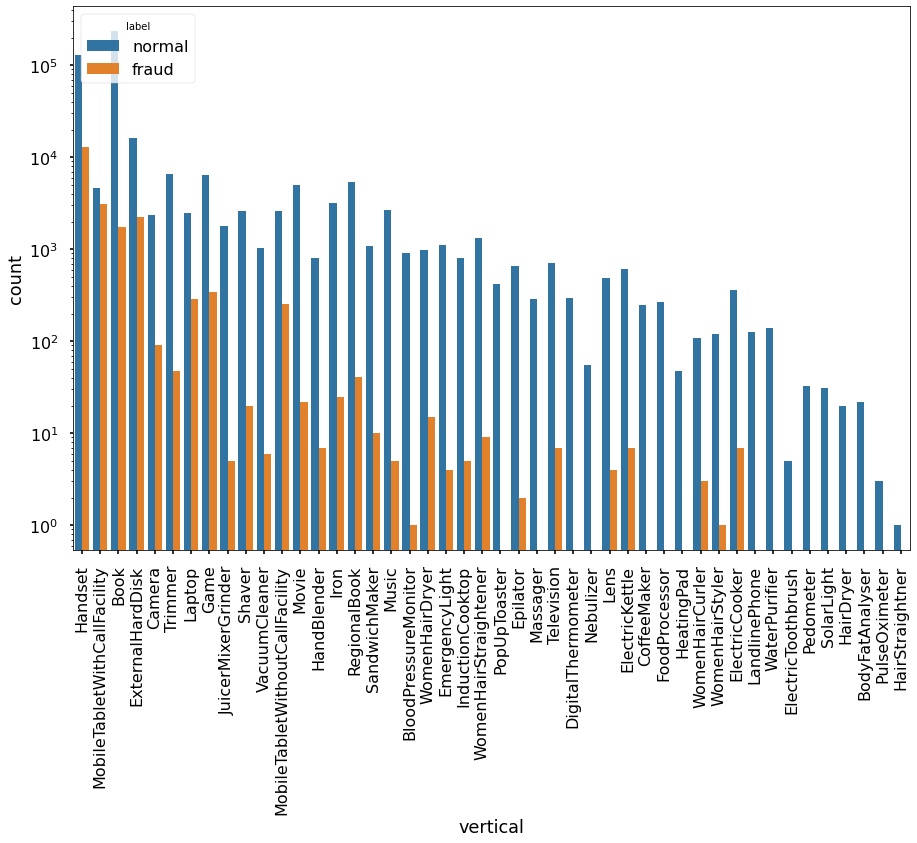

In [38]:
plt.figure(figsize = (15,10))
sns.countplot(x="vertical", hue="label", data=df)
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()


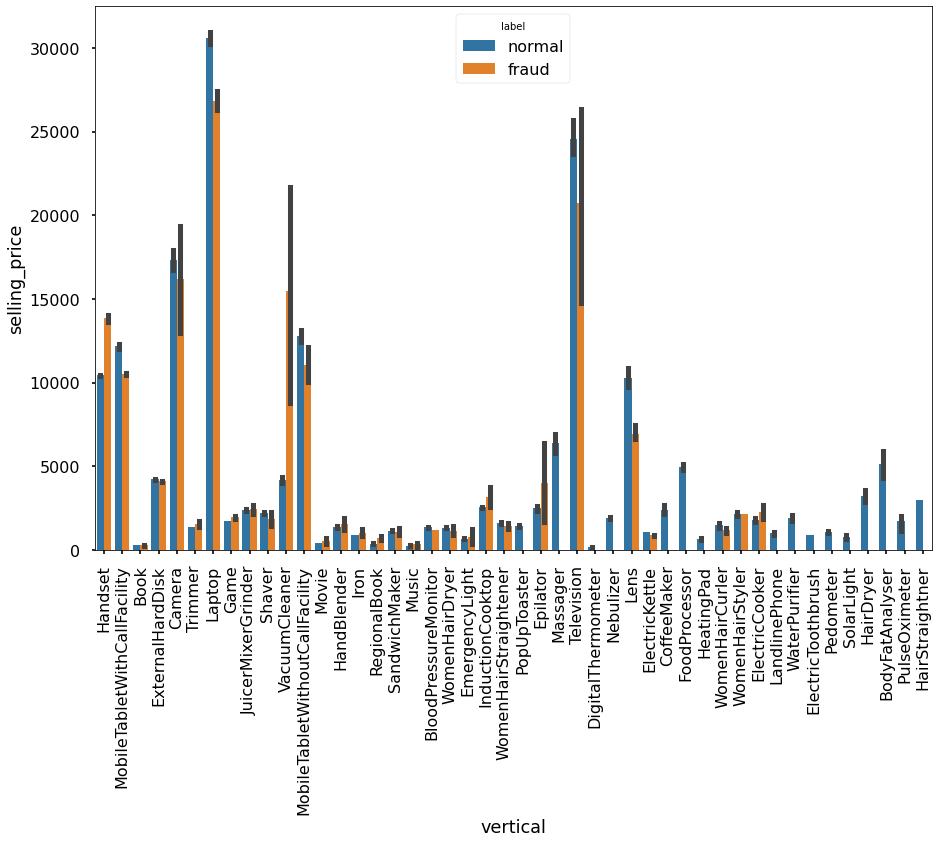

In [39]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'vertical',y ='selling_price',hue='label',data=df)
plt.xticks(rotation = 90)
plt.show()

From the above plot we can see that for certain categories the selling price is high in the fraud category. On an average , fraudsters tend to purchase high value items in those categories as compared to normal users. 

* handset
* vacuum cleaner
* induction cooktop 
* epilator

In [40]:
df[df.vertical=='VacuumCleaner'].groupby('label')['selling_price'].mean()

label
fraud     15480.666667
normal     4198.409441
Name: selling_price, dtype: float64

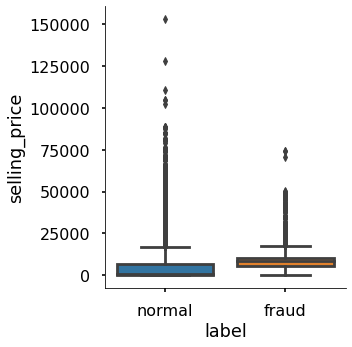

In [41]:
sns.catplot(y="selling_price", x="label",
                data=df,
                kind="box")

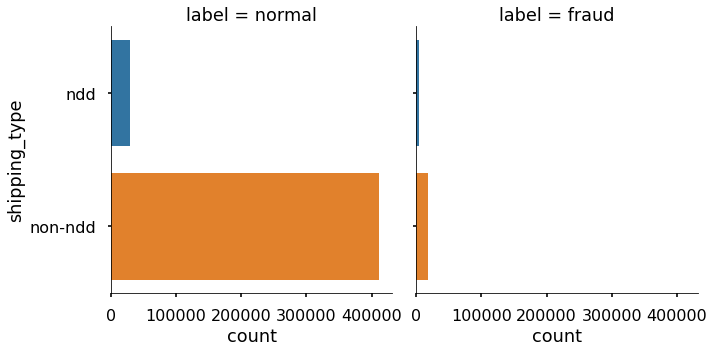

In [42]:
sns.catplot(y = "shipping_type",col = "label", kind = 'count' , data = df)

Shipping_type doesn't seem to be a distinguishing pattern in this case.Both datasets have both kinds of shipping.We can keep this variable for now and later assess its importance.  

* user_id, user_account_created_date, address_id are correlated variables. They all belong to the same user. I will first encode them and then use assess their correlation. 

## Preprocessing 
- encoding categorical variables 


In [43]:
## Encode shipping_type col
df['shipping_type'] = df['shipping_type'].map({'non-ndd':0,'ndd':1})

#Encode label cols
df['label'] = df['label'].map({'normal':0,'fraud':1})

### Split data into train and test sets 

In [44]:
X = df.drop('label', axis = 1)
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify =y)

In [45]:
y_train.value_counts(normalize = True)

0    0.953679
1    0.046321
Name: label, dtype: float64

In [46]:
y_test.value_counts(normalize = True)

0    0.953677
1    0.046323
Name: label, dtype: float64

In [47]:
X_test.head()

,product_id,quantity,selling_price,shipping_type,user_id,address_id,city,pincode,phone,vertical,...,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,duration_customer
235979,72c9a794b76376b2aae0a5b4cea40d03,1,6999,0,f22e0700099b198d3e70cc88d123c574,94f92b8517a9e6b83cd3f348abc3e4ab,ba12b9cac983951fcf97219f01b15ce9,bc181b7517d2de2ecd2c558d89c27416,7dfe493430662da0117bbd960f228efe,Handset,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,824
273553,77bf561dc46c5cb27c2defcca59e3f06,1,219,0,bd769626db891a46baf07fc429b2a60f,7c913b1a76bec877e1a39e8eaee6631e,6f87bb9a52d89d39fc0f1aabb8035722,a1b56018dcff4b7cf65e638b4c27355a,91c3879c02f37bf29746e1f9eeb481b5,Book,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,89
424174,573c91b21d1e889acf13953d962dfe2f,1,225,0,64c63f265ef4ab7f86b4eaacbb55065b,75fe4813138ec0e2d1e6ed09b14c31fe,20d2ac17f777df74ad893cdfa2e8ceaf,eb5805ce0995fcc3431956dc8d59bd1b,e13d6fb7214fa1132fc9d093c9cc0099,Book,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,302
273663,9d688e1081c808526ba48bfd4ec81eb1,1,118,0,25f824382243d94fa2acd9249d265e9f,7e033510a954746e75f10f952d191c34,20f5b086ee309eb5c749145d3f0d939f,befb6c58605b483a4db6dc3018b1ec59,91d464fd98d7d27a9acf0b102b180a28,Book,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1022
38398,110a0fad868e396102505f246e39c6e9,1,8799,0,7802d643f09d160291f4a99879da1424,32b0277e2229838caeda443308e9e8be,09e302fa434e3de8da222109ac0e2e43,24fc820dc237ddcb065faf39cb59174d,14cba10fb77fc56d48304f30678ef94f,Handset,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [48]:
high_cardinality_cols = ['product_id','address_id', 'city', 'pincode', 'phone', 'vertical']


### Encode high cardinality categorical variables 
We can use target encoding for these features which will convert them into numeric features.

In [2]:
import category_encoders as ce
tenc=ce.TargetEncoder() 
X_train_ce=tenc.fit_transform(X_train,y_train)

In [50]:
X_test_ce = tenc.transform(X_test)

In [51]:
X_test_ce.head()

,product_id,quantity,selling_price,shipping_type,user_id,address_id,city,pincode,phone,vertical,...,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,duration_customer
235979,1.882888e-02,1,6999,0,0.046321,0.046321,0.033166,3.056769e-02,0.046321,0.091339,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,824
273553,8.228229e-17,1,219,0,0.012458,0.012458,0.019737,3.512304e-11,0.005522,0.007356,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,89
424174,0.000000e+00,1,225,0,0.046321,0.046321,0.062973,4.329004e-03,0.046321,0.007356,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,302
273663,1.245758e-02,1,118,0,0.046321,0.046321,0.106998,4.228571e-02,0.046321,0.007356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1022
38398,4.388613e-01,1,8799,0,0.046321,0.046321,0.021532,0.000000e+00,0.046321,0.091339,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


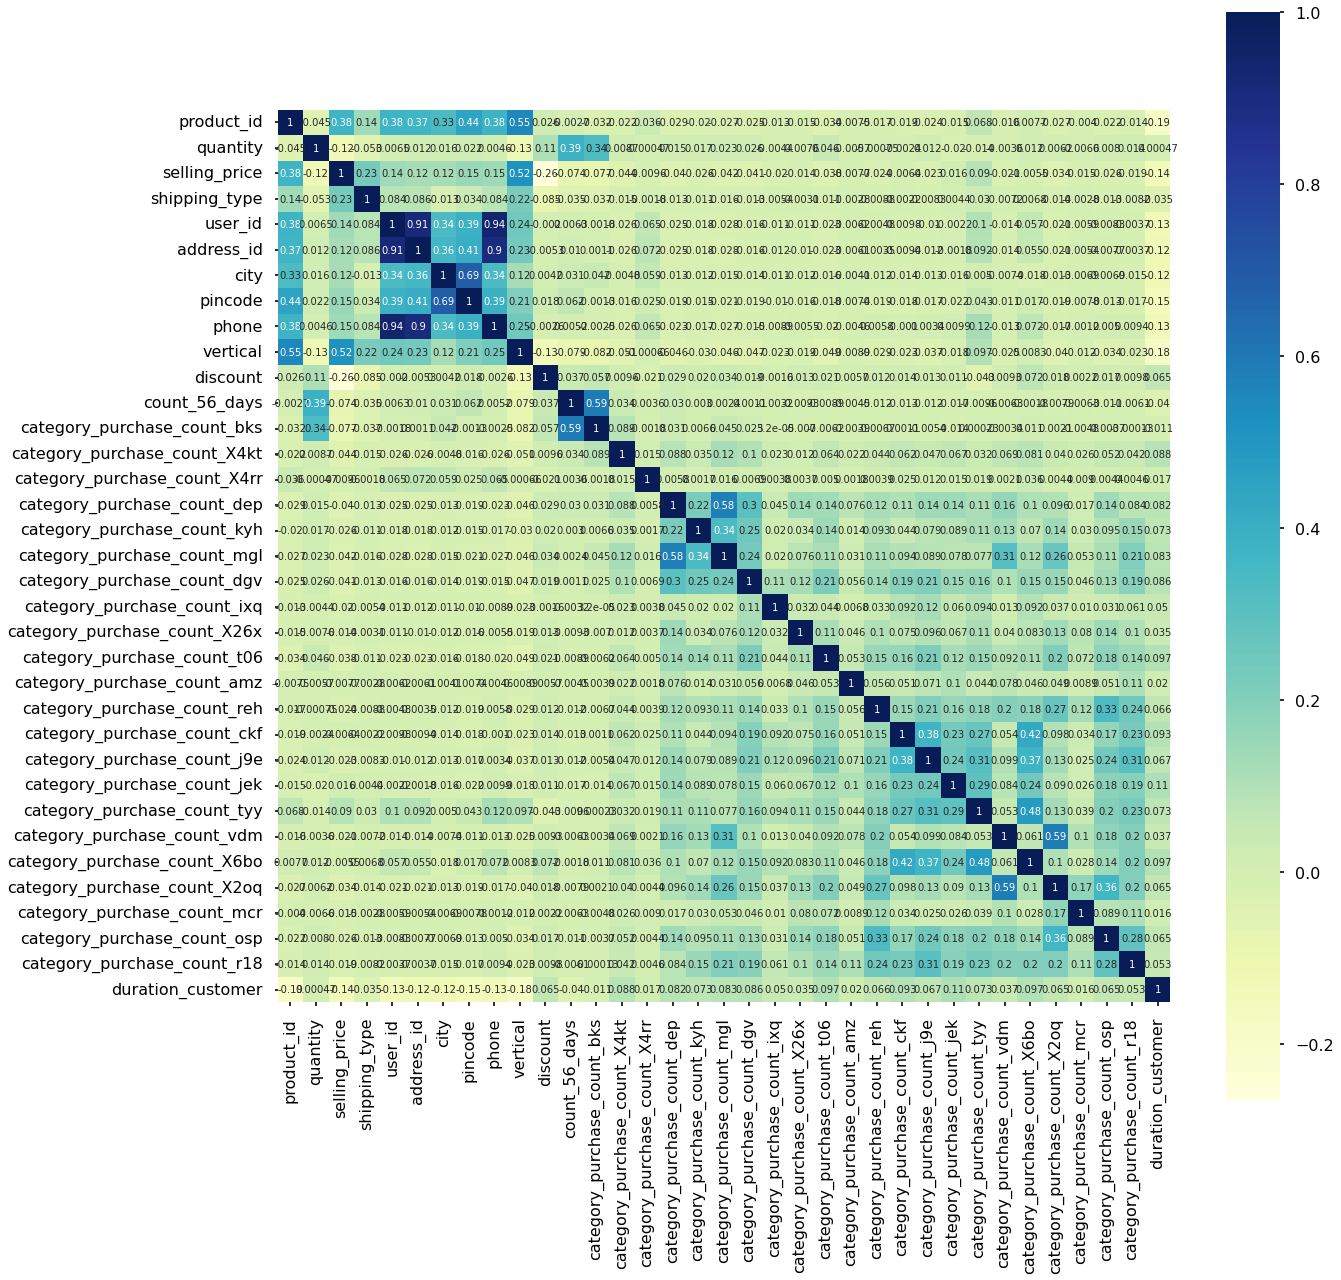

In [52]:
corrmat_train = X_train_ce.corr()
fig = plt.figure(figsize = (20, 20))
sns.heatmap(corrmat_train, vmax = 1, square = True, cmap = "YlGnBu", annot = True)
plt.show()

As expected, some of the user information related features will be highly correlated. 
- user_id,address_id, phone
- city, pincode

# Model Building 

Since we are dealing with an imbalanced classification problem, we can take area under the precision recall curve as our metric. 
Also, we should use Stratified K-Fold for cross validation

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score,recall_score,f1_score

In [54]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range = (0,1))
# scaler = StandardScaler()
scaler.fit(X_train_ce)
X_train_ce = scaler.transform(X_train_ce)
X_test_ce = scaler.transform(X_test_ce)

In [55]:
# calculate precision-recall area under curve
def pr_auc(y_true, probas_pred):
    # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, probas_pred)
    # calculate area under curve
    return auc(r, p)
 
# evaluate a model
def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = StratifiedKFold(n_splits=5)
    # define the model evaluation the metric
    metric = make_scorer(pr_auc, needs_proba=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    return scores

### Baseline Model
If we always predict the positive class. 

In [56]:
# define the baseline model
model = DummyClassifier(strategy='constant', constant=1)
# evaluate the model
scores = evaluate_model(X_test_ce, y_test, model)
# summarize performance
print('Mean PR AUC: %.3f (%.3f)' % (np.mean(scores),np.std(scores)))

Mean PR AUC: 0.523 (0.000)


In [57]:
def summarize_results(grid_result):
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [58]:
cv = StratifiedKFold(n_splits=5)
scoring = make_scorer(pr_auc, needs_proba=True)

### Logistic Regression

In [60]:
log_reg=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2'],"solver":['liblinear']}
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring)
grid_result_lr = grid_search_lr.fit(X_train_ce, y_train)

In [64]:
summarize_results(grid_result_lr)

Best: 0.865489 using {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.856579 (0.007227) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.855145 (0.008149) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.863040 (0.007224) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.860601 (0.007517) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.864950 (0.006657) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.863546 (0.007164) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.865489 (0.006741) with: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.864997 (0.006632) with: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.865320 (0.006770) with: {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.865461 (0.006790) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [65]:
y_pred = grid_result_lr.predict(X_test_ce)

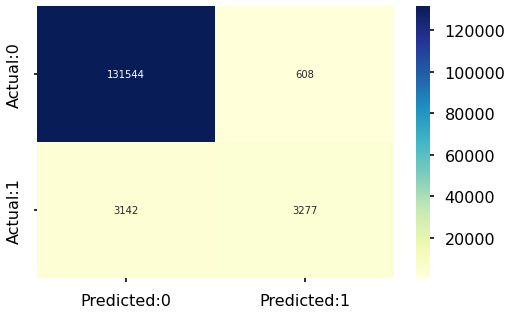

In [66]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    132152
           1       0.84      0.51      0.64      6419

    accuracy                           0.97    138571
   macro avg       0.91      0.75      0.81    138571
weighted avg       0.97      0.97      0.97    138571



### RandomForestClassifier

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train_ce,y_train)
y_pred=rf.predict(X_test_ce)

In [76]:
# evaluate the model on cross validation score using PR AUC 
scores = evaluate_model(X_train_ce, y_train, rf)
# summarize performance
print('Mean PR AUC: %.3f (%.3f)' % (np.mean(scores),np.std(scores)))

Mean PR AUC: 0.936 (0.005)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    132152
           1       0.91      0.71      0.80      6419

    accuracy                           0.98    138571
   macro avg       0.95      0.86      0.90    138571
weighted avg       0.98      0.98      0.98    138571



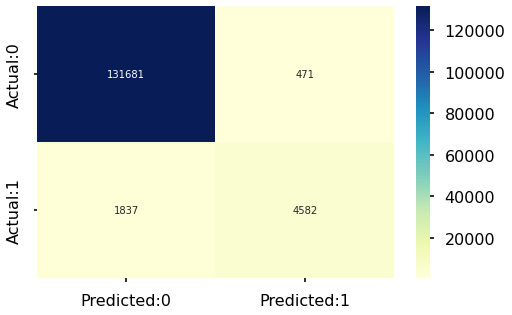

In [69]:
# confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
print(classification_report(y_test,y_pred))

Training with default configuration of random forest model still produces better results as compared to the logistic regression model with a mean PR AUC of 0.93 on cv and f1-score of 0.8 on test data. We can visualize the feature importances to see the variable importance. I am using permutation importance as feature importances from RF model can be biased towards high cardinality variables. 

## Hyperparameter tuning 
I will try hyperparameter tuning to see if we can further improve the model.

In [113]:
rf = RandomForestClassifier()

grid={'n_estimators':[50,100,300],
      'max_features':['sqrt',5,8,10]
     }
grid_search_rf = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=cv, scoring=scoring)
grid_result_rf = grid_search_rf.fit(X_train_sel, y_train)

# summarize results
summarize_results(grid_result_rf)

# Predict on test set
y_pred = grid_result_rf.predict(X_test_sel)

Best: 0.937721 using {'max_features': 'sqrt', 'n_estimators': 300}
0.934838 (0.004521) with: {'max_features': 'sqrt', 'n_estimators': 50}
0.935557 (0.004624) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.937721 (0.004733) with: {'max_features': 'sqrt', 'n_estimators': 300}
0.933795 (0.004525) with: {'max_features': 5, 'n_estimators': 50}
0.935389 (0.004620) with: {'max_features': 5, 'n_estimators': 100}
0.936738 (0.004488) with: {'max_features': 5, 'n_estimators': 300}
0.932985 (0.004289) with: {'max_features': 8, 'n_estimators': 50}
0.934455 (0.004879) with: {'max_features': 8, 'n_estimators': 100}
0.935757 (0.004625) with: {'max_features': 8, 'n_estimators': 300}
0.932322 (0.004281) with: {'max_features': 10, 'n_estimators': 50}
0.933444 (0.004833) with: {'max_features': 10, 'n_estimators': 100}
0.934934 (0.004372) with: {'max_features': 10, 'n_estimators': 300}


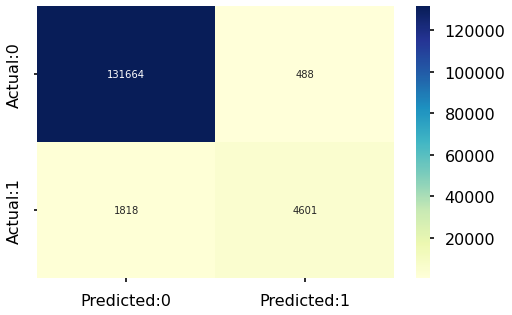

In [114]:
# confusion Matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    132152
           1       0.90      0.72      0.80      6419

    accuracy                           0.98    138571
   macro avg       0.95      0.86      0.90    138571
weighted avg       0.98      0.98      0.98    138571



That didn't give any gain in performance.The default configurations seem to work well in this case. 

## Final Comments
There are lots of things that we could still try to improve this model like trying other classifiers, finer hyperparameter tuning and maybe more feature engineering. Having the business context would help in geeting intution about the features. 
We could also try SMOTE for oversampling fraud cases to see if we gain performance. 